<a href="https://colab.research.google.com/github/ssuzana/Data-Structures-and-Algorithms-Notebooks/blob/main/09_Backtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Backtracking - How it works?**

**In any backtracking problems, the algorithm tries to find a path to the feasible solution which has some intermediary checkpoints. In case they don’t lead to the feasible solution, the problem can backtrack from the checkpoints and take another path in search of the solution.**

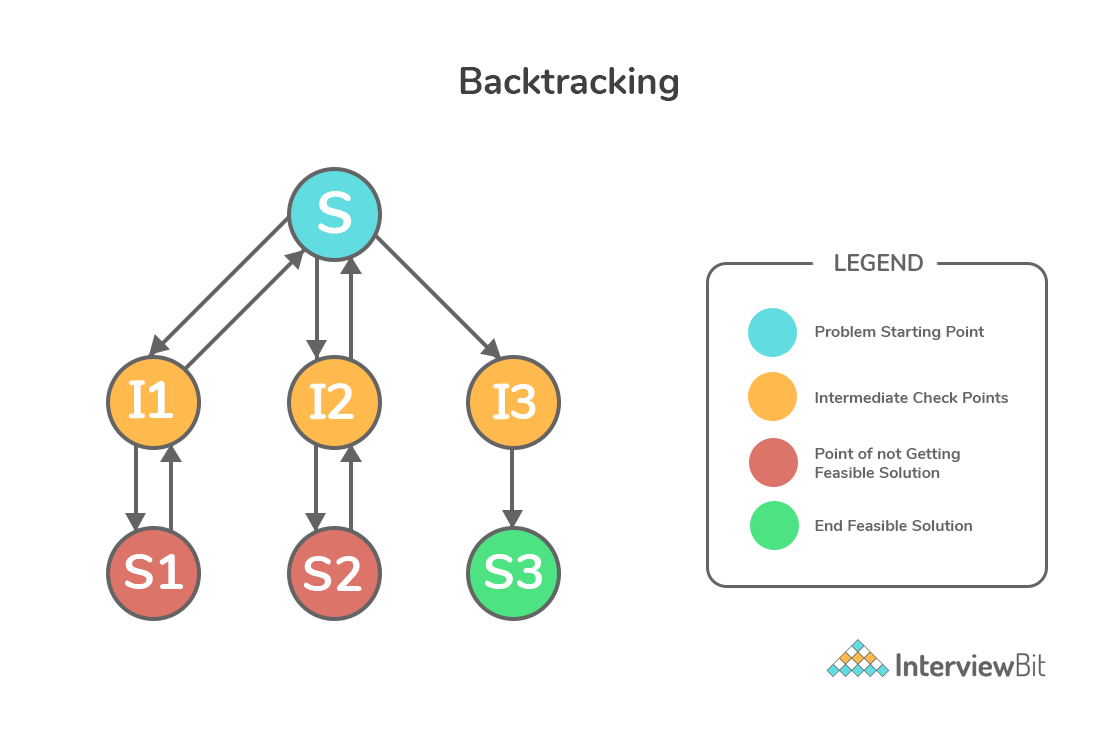

* Here S is the starting point of the problem. We start from S, we go to find solution S1 via the intermediate point I1. But we find that the solution S1 is not a feasible solution to our problem. Hence, we backtrack (go back) from S1, go back to I1, go back to S and then check for the feasible solution S2. This process happens till we arrive at a feasible solution.

* Here, S1 and S2 are not the feasible solutions. Only S3 is a feasible solution as per our example. When we look at this example, we can see that we traverse through all possible combinations, till we arrive at the feasible solution. This is why, we say that backtracking is a brute-force algorithmic technique.

* The above tree representation of a problem is called as a **space state tree**. It represents all possible states (solution or non-solution) of that given problem.

* The final algorithm can be summarised as:

  * Step 1 − if current point is a feasible solution, return success
  * Step 2 − else if all paths are exhausted (i.e current point is an end point), return failure, since we have no feasible solution.
  * Step 3 − else if current point is not an end point, backtrack and explore other points and repeat above steps.



Conceptually, one can imagine the procedure of backtracking as the tree traversal. Starting from the root node, one sets out to search for solutions that are located at the leaf nodes. Each intermediate node represents a partial candidate solution that could potentially lead us to a final valid solution. At each node, we would fan out to move one step further to the final solution, i.e. we iterate the child nodes of the current node. Once we can determine if a certain node cannot possibly lead to a valid solution, we abandon the current node and backtrack to its parent node to explore other possibilities. It is due to this backtracking behaviour, the backtracking algorithms are often much faster than the **brute-force search algorithm**, since it eliminates many unnecessary exploration. 

#**Backtracking FAQ**

##**What are backtracking algorithms?**
Backtracking is an algorithmic technique for finding all solutions to some computational problems that have certain constraints and incrementally builds candidates to the solutions while abandoning a candidate if it does not lead to valid solutions.
##**How Backtracking algorithms work?**
Backtracking uses recursive approach to find feasible solution by building a solution incrementally with time and removing the solutions that dont lead to feasible solution for the problem based on the constraints given.
##**When is backtracking used?**
Backtracking is normally used when we are faced with a multiple number of options and we have to choose one among them based on the constraints given. After the choice we will be having a new set of options which is where the recursion comes to the rescue. The procedure is repeated untill we get a feasible solution.
##**Is backtracking better than brute force algorithms?**
Brute force algorithms are those which computes every possible solution to a problem and then selects the best one among them that fulfills the given requirements.
Whereas, backtracking is a refined brute force technique where the implicit constraints are evaluated after every choice (not as in brute force where evaluation is done after all solutions have been generated). This means that potential non-satisfying solutions can be rejected before the computations have been ‘completed’.


#**Example**
Let's try to understand the concept of backtracking by a very basic example. We are given a set of words represented in the form of a tree. The tree is formed such that every branch ends in a word.

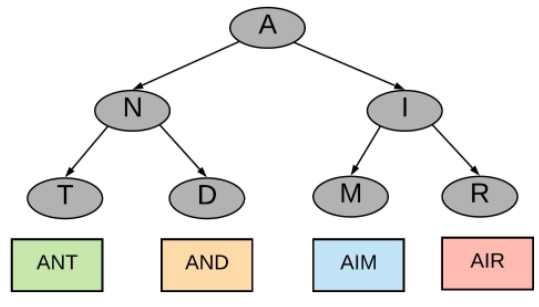

Our task is to find out if a given word is present in the tree. Let's say we have to search for the word AIM. A very brute way would be to go down all the paths, find out the word corresponding to a branch and compare it with what you are searching for. You will keep doing this unless you have found out the word you were looking for.

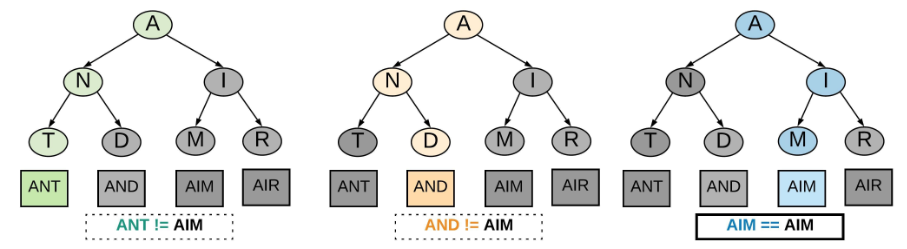

In the diagram above our brute approach made us go down the path for ANT and AND before it finally found the right branch for the word AIM.

The backtracking way of solving this problem would stop going down a path when the path doesn't seem right. When we say the path doesn't seem right we mean we come across a node which will never lead to the right result. As we come across such node we back-track. That is go back to the previous node and take the next step.

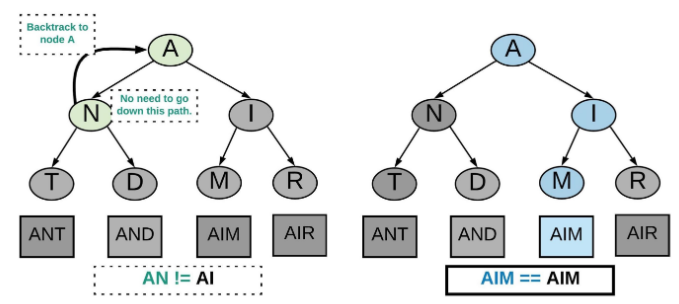

In the above diagram backtracking didn't make us go down the path from node N. This is because there is a mismatch we found early on and we decided to go back to the next step instead. Backtracking reduced the number of steps taken to reach the final result. This is known as pruning the recursion tree because we don't take unnecessary paths.

#**Leeetcode 78. Subsets** `Medium`

Given an integer array `nums` of unique elements, return all possible subsets (the power set).

The solution set must not contain duplicate subsets. Return the solution in any order.


**Solution 1 (no backtracking)**: Start from empty subset in output list. 
At each step one takes new integer into consideration
and generates new subsets from the existing ones.

Time complexity: $O(N×2^N)$ to generate all subsets and then copy them into output list.

Space complexity: $O(N×2^N)$. This is exactly the number of solutions for subsets multiplied by the number $N$ of elements to keep for each subset.

In [ ]:
def subsets(nums):
  res = [[]]
        
  for num in nums:
    res += [s + [num] for s in res]
            
  return res    

**Solution 2 (using backtracking)**

Time complexity: $O(N×2^N)$ to generate all subsets and then copy them into output list.

Space complexity: $O(N)$. We are using $O(N)$ space to maintain `cur`, and are modifying `cur` in-place with backtracking. 

In [ ]:
def subsets(nums):
  res = []
   
  def backtrack(start_idx = 0, cur = []):
    res.append(cur.copy())
            
    for i in range(start_idx, len(nums)):
      # add integer nums[i] to the current list combination cur
      cur.append(nums[i])
                
      # add next integers into the combination 
      backtrack(i+1, cur)
                
      # backtrack by removing nums[i] from cur
      cur.pop()
                
  backtrack()
        
  return res

In [ ]:
# Example 1:
nums1 = [1,2,3]
print(subsets(nums1))
# Output: [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

# Example 2:
nums2 = [0]
print(subsets(nums2))
#Output: [[],[0]]

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]
[[], [0]]


<p style="page-break-after:always;"></p>

#**Leetcode 46. Permutations** `Medium`

Given an array `nums` of distinct integers, return all the possible permutations. You can return the answer in any order.

<p style="page-break-after:always;"></p>

In [ ]:
from typing import List
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        #return permutations(nums)
        if len(nums) == 0:
            return []
        if len(nums) == 1:
            return [nums]
        result = [] 
        for i in range(len(nums)):
            num  = nums.pop(i)
            for p in self.permute(nums):
                result.append([num] + p)
            nums.insert(i, num)    
        return result    
            

In [ ]:
# Example:
nums = [1,2,3]
# Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]
sol = Solution()
sol.permute(nums)

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

#**Leetcode 39. Combination Sum** `Medium`

Given an array of distinct integers `candidates` and a target integer `target`, return a list of all unique combinations of candidates where the chosen numbers sum to `target`. You may return the combinations in any order.

The same number may be chosen from candidates an unlimited number of times. Two combinations are unique if the frequency of at least one of the chosen numbers is different.

It is guaranteed that the number of unique combinations that sum up to target is less than 150 combinations for the given input.

In [ ]:
from typing import List

class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        res = []
   
        def dfs(idx, cur, total):
        
            if total == target:
                res.append(cur[:])
                return
            
            if idx >= len(candidates) or total > target:
                return

            cur.append(candidates[idx])

            dfs(idx, cur, total + candidates[idx])

            cur.pop()
            dfs(idx+1, cur, total)
                
        dfs(0, [], 0)
        
        return res

In [ ]:
# Time Complexity: O(2^n)

from typing import List

class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        res = []
        
        def dfs(candidates, start_index, cur_diff, cur):
            if cur_diff == 0:
                res.append(cur[:])
                return
            for i in range(start_index, len(candidates)):
                candidate = candidates[i]
                if cur_diff - candidate < 0:
                    continue
                dfs(candidates, i, cur_diff - candidate, cur + [candidate])

        dfs(candidates, 0, target, [])
        return res

In [ ]:
# Example 1
candidates = [2,3,6,7]
target = 7
# Output: [[2,2,3],[7]]
sol = Solution()
sol.combinationSum(candidates, target)

[[2, 2, 3], [7]]

#**Leetcode 40. Combination Sum II** `Medium`

Given a collection of candidate numbers (`candidates`) and a target number (`target`), find all unique combinations in candidates where the candidate numbers sum to `target`.

Each number in candidates may only be used once in the combination.

Note: The solution set must not contain duplicate combinations.



In [ ]:
from typing import List

class Solution:
    def combinationSumTwo(self, candidates: List[int], target: int) -> List[List[int]]:
        
        candidates.sort()
        res = []
        
        def dfs(candidates, start_index, cur_diff, cur):
            
            if cur_diff == 0:
                res.append(cur[:])
                return
            
            for i in range(start_index, len(candidates)):
                
                if i > start_index and candidates[i] == candidates[i-1]:
                    continue
      
                candidate = candidates[i]
                if cur_diff - candidate < 0:
                    continue
               
                dfs(candidates, i+1, cur_diff - candidate, cur + [candidate])

        dfs(candidates, 0, target, [])
        return res
        

In [ ]:
# Example:
candidates = [10,1,2,7,6,1,5]
target = 8
#Output: [[1,1,6],[1,2,5],[1,7],[2,6]]
sol = Solution()
sol.combinationSumTwo(candidates, target)


[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]

#**Leetcode 90. Subsets II** `Medium`

Given an integer array `nums` that may contain duplicates, return all possible subsets (the power set).

The solution set must not contain duplicate subsets. Return the solution in any order.

In [ ]:
from typing import List

class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        
        nums.sort()
        res = []
        
        def dfs(start_index, cur):
            
            res.append(cur[:])
        
            for i in range(start_index, len(nums)):
                
                if i > start_index and nums[i] == nums[i-1]:
                    continue
                    
                cur.append(nums[i])
                
              
                dfs(i+1, cur)
                
              
                cur.pop()   
         
        dfs(0,[])
        
        return res
                

In [ ]:
# Example:
nums = [1,2,2]
# Output: [[],[1],[1,2],[1,2,2],[2],[2,2]]
sol = Solution()
sol.subsetsWithDup(nums)

[[], [1], [1, 2], [1, 2, 2], [2], [2, 2]]

#**Leetcode 131. Palindrome Partitioning** `Medium`

Given a string `s`, partition `s` such that every substring of the partition is a palindrome. Return all possible palindrome partitioning of `s`.

A palindrome string is a string that reads the same backward as forward.


In [ ]:
from typing import List
class Solution:
    def partition(self, s: str) -> List[List[str]]:
        
        def isPalindrome(string):
            return string == string[::-1]
        
        res = []
        
        def dfs(start_idx, cur):
        
            if start_idx == len(s):
                res.append(cur[:])
                return
            
            for i in range(start_idx + 1, len(s) + 1):
                substr = s[start_idx:i]
                if isPalindrome(substr):
                    dfs(i, cur + [substr])
                
        dfs(0, [])
        
        return res
        

In [ ]:
# Example:
s = "aab"
# Output: [["a","a","b"],["aa","b"]]
sol = Solution()
sol.partition(s)

[['a', 'a', 'b'], ['aa', 'b']]

#**Leetcode 17. Letter Combinations of a Phone Number** `Medium`

Given a string containing digits from `2-9` inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.

A mapping of digit to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

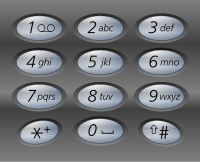

In [ ]:
from typing import List

class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        buttons = {'2' : 'abc',
                   '3' : 'def',
                   '4' : 'ghi',
                   '5' : 'jkl',
                   '6' : 'mno',
                   '7' : 'pqrs',
                   '8' : 'tuv',
                   '9' : 'wxyz'}        
            
        res = []
        
        if len(digits) == 0:
            return res
        
        def dfs(idx, cur):
            
            if idx == len(digits):
                res.append(cur)
                return
            
            for letter in buttons[digits[idx]]:
                cur += letter
                dfs(idx+1, cur)
                cur = cur[:-1]
            
                    
        dfs(0,"")        
        return res

In [ ]:
# Example 1:
digits1 = "23"
# Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]

# Example 2:
digits2 = ""
# Output: []

sol = Solution()
sol.letterCombinations(digits1)
sol.letterCombinations(digits2)

[]

#**Leetcode 79. Word Search** `Medium`

Given an `m x n` grid of characters `board` and a string `word`, return `true` if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

**Example:**

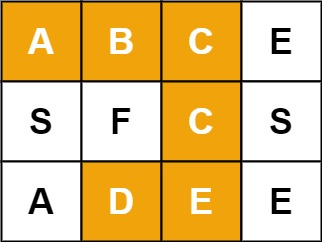

Input: `board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]`, `word = "ABCCED"`
Output: `true`

In [ ]:
from typing import List
class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:

        m = len(board)
        n = len(board[0])
        path = set()
        
        def dfs(i,j, idx):
            
            if idx == len(word):
                return True
            
            if (i < 0 or i >= m or j < 0 or j >= n or word[idx] != board[i][j] or (i,j) in path):
                return False
            
            path.add((i,j))
            
            res = (dfs(i-1,j, idx + 1) or
                   dfs(i+1,j, idx + 1) or
                   dfs(i,j-1, idx + 1) or
                   dfs(i, j+1, idx +1))
            
            path.remove((i,j))
            
            return res
        
        for i in range(m):
            for j in range(n):
                if dfs(i,j,0):
                    return True
                
        return False        


In [ ]:
board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
word = "ABCCED"
sol = Solution()
sol.exist(board, word)

True